# Team 22 Final EDA 

#### Loading Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import display
pd.options.display.max_columns = None

#### Setting Up Colors

In [2]:
main_color = 'limegreen'
bg_color = 'black'
palette = ['greenyellow', 'chartreuse', 'lawngreen', 'limegreen', 'lime']
plt.style.use("dark_background")
sns.set_palette(palette)

#### Importing Data

In [3]:
# collab_data = pd.read_csv("../Final_Data/US_Spotify_Data.csv")
collab_data0 = pd.read_csv("../output/2021.01.23 spotify_us_all_fe.csv", index_col=0)
collab_data0['Date'] = pd.to_datetime(collab_data0['Date'])
collab_data = collab_data0[collab_data0['No. of Artists'] > 1]

collab_data.head()

,Date,Track Name,Streams,Position,Artist Name,Artist No.,No. of Artists,Artist Genre,Track URI2,Country,Track URI,Artist URI,Album URI,Album_release_month,Album_release_dayweek,Album Release,Year_chart,Month_chart,Song_first_onchart,Song_days_since_first,Song_days_onchart,Song_days_since_release,Song_streak_id,Song_consec_day,Artist_first_onchart,Artist_cumu_songs,Artist_cumu_collab,Artist_cumu_solo,Artist_days_onchart,Collab_avg_days_onchart,Collab_avg_cumu_songs,Collab_avg_cumu_collab,Collab_avg_cumu_solo,Revenue
3,2017-01-01,679 (feat. Remy Boyz),143877.0,197.0,Fetty Wap,1,2,"['new jersey rap', 'pop rap', 'rap', 'southern...","679 (feat. Remy Boyz)['Fetty Wap', 'Remy Boyz']",United States,5NQbUaeTEOGdD6hHcre0dZ,6PXS4YHDkKvl1wkIl4V8DL,0TyDTzG2zt2tg0wONT9wSU,6,Mon,2015-06-29,2017,1,2017-01-01,0.0,1,552,1,1,2017-01-01,3,2,1,1,1.0,2.0,1.5,0.5,476.23287
4,2017-01-01,679 (feat. Remy Boyz),143877.0,197.0,Remy Boyz,2,2,[],"679 (feat. Remy Boyz)['Fetty Wap', 'Remy Boyz']",United States,5NQbUaeTEOGdD6hHcre0dZ,2s0yxtiHiyGe6CY4mbDYFi,0TyDTzG2zt2tg0wONT9wSU,6,Mon,2015-06-29,2017,1,2017-01-01,0.0,1,552,1,1,2017-01-01,1,1,0,1,1.0,2.0,1.5,0.5,476.23287
7,2017-01-01,Ain't No Mountain High Enough,260834.0,69.0,Marvin Gaye,1,2,"['classic soul', 'funk', 'motown', 'northern s...","Ain't No Mountain High Enough['Marvin Gaye', '...",United States,2H3ZUSE54pST4ubRd5FzFR,3koiLjNrgRTNbOwViDipeA,6sbZYwwQB15bt5TgkPFAdb,8,Tue,1967-08-29,2017,1,2017-01-01,0.0,1,18023,1,1,2017-01-01,1,1,0,1,1.0,1.0,1.0,0.0,863.36054
8,2017-01-01,Ain't No Mountain High Enough,260834.0,69.0,Tammi Terrell,2,2,"['brill building pop', 'classic soul', 'motown']","Ain't No Mountain High Enough['Marvin Gaye', '...",United States,2H3ZUSE54pST4ubRd5FzFR,75jNCko3SnEMI5gwGqrbb8,6sbZYwwQB15bt5TgkPFAdb,8,Tue,1967-08-29,2017,1,2017-01-01,0.0,1,18023,1,1,2017-01-01,1,1,0,1,1.0,1.0,1.0,0.0,863.36054
9,2017-01-01,All Night,220922.0,89.0,The Vamps,1,2,"['boy band', 'dance pop', 'pop', 'post-teen pop']","All Night['The Vamps', 'Matoma']",United States,4b4KcovePX8Ke2cLIQTLM0,7gAppWoH7pcYmphCVTXkzs,52bwpFP1d8uri0V5oWQLF0,7,Fri,2017-07-14,2017,1,2017-01-01,0.0,1,-194,1,1,2017-01-01,1,1,0,1,1.0,1.0,1.0,0.0,731.25182


#### Cleaning Up Genres

In [4]:
collab_genres = collab_data[["Artist Name", "Position", "Streams", "Revenue", "Artist Genre"]].copy()

collab_genres['Artist Genre'] = collab_genres['Artist Genre'].apply(lambda x: x.replace('[', ''))
collab_genres['Artist Genre'] = collab_genres['Artist Genre'].apply(lambda x: x.replace(']', ''))
collab_genres['Artist Genre'] = collab_genres['Artist Genre'].apply(lambda x: x.replace("'", ''))
collab_genres['Artist Genre'] = collab_genres['Artist Genre'].apply(lambda x: x.replace(', ', ','))
collab_genres['Artist Genre'] = collab_genres['Artist Genre'].apply(lambda x: x.split(','))

collab_genres = collab_genres.explode('Artist Genre')
collab_genres = collab_genres[collab_genres['Artist Genre'] != '']

# collab_genres.to_csv("../Final_Data/US_Spotify_Genre_Data.csv")

## Page 1 - Overview

Overview of our data: 

We have collected all Spotify Top 200 Charts in the United States between January 1, 2017 and December 31, 2020. This data is then augmented with information from Spotify's API to include information on Artists involved, Genres, and Album release dates, etc. We then subset this data to only songs involving more than one artist. 

The main metrics of success used in our analyses are position on the chart (smaller is better), number of streams, and revenue. While revenue is not part of Spotify's data, we assume that it varies linearly with Streams, at a rate of of $0.00331 per stream. Statistically, this does not make revenue any different from streams, but we thought it would be a useful metric to have from a business standpoint.

Main takeaways:
- Most collaborations in the Top 200 US chart involve 2 - 3 artists.
- Most collaborations tend to feature an artist whose genre includes rap, pop rap, or trap.
- The longer a track stays on the chart, the lower it tends to rank and the fewer streams/less revenue it tends to get.
- Tracks that tend to perform better within their first day on the chart are those released close to the weekends (Friday - Saturday).  

### 1.1 Number Of Collaborator Effects

#### Count

Text(0.5, 1.0, 'Count in Dataset and Number of Collaborators')

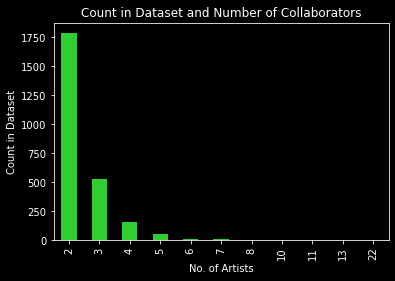

In [5]:
count_collaborators = (
    collab_data.drop_duplicates("Track URI2")
    .groupby(["No. of Artists"])
    .count()
    .reset_index()
    .sort_values(by="No. of Artists", ascending= True)
    .plot.bar(x="No. of Artists", y="Track URI2", color = main_color)
)

count_collaborators.set_facecolor(bg_color)
count_collaborators.get_legend().remove()
count_collaborators.set_xlabel("No. of Artists")
count_collaborators.set_ylabel("Count in Dataset")
count_collaborators.set_title("Count in Dataset and Number of Collaborators")

This chart shows the frequency of different numbers of artists involved in a collaboration on Spotify's chart. Tracks involving 2 - 3 artists account for the vast majority of the chart. On the other end of the spectrum, there are very few songs involving more than 10 artists, and the majority of them are ensemble/musical tracks.

#### Position

Text(0.5, 1.0, 'Average Position and Number of Collaborators')

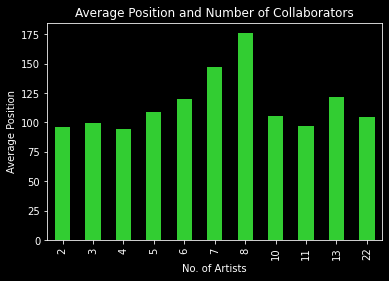

In [6]:
position_collaborators = (
    collab_data[['Date', 'Track URI2', 'No. of Artists', 'Position']]
    .drop_duplicates()
    .groupby(["No. of Artists"])["Position"]
    .mean()
    .reset_index(name="Position")
    .sort_values(by="No. of Artists", ascending= True)
    .plot.bar(x="No. of Artists", y="Position", color = main_color)
)
position_collaborators.set_facecolor(bg_color)
position_collaborators.get_legend().remove()
# position_collaborators.invert_yaxis()
position_collaborators.set_xlabel("No. of Artists")
position_collaborators.set_ylabel("Average Position")
position_collaborators.set_title("Average Position and Number of Collaborators")

This bar chart shows the relationship between the number of artists credited in a track and the average position attained. Between 2 - 3 artists, there does not seem to an apparent difference in the average position. However, between 4 - 8 artists, tracks with more artists tend to rank lower on the chart. After 8 artists, there seem to be no apparent pattern. Given that there are so few tracks with more than 8 artists, the data in this domain is not likely to be reliable. 

#### Streams

Text(0.5, 1.0, 'Average Streams and Number of Collaborators')

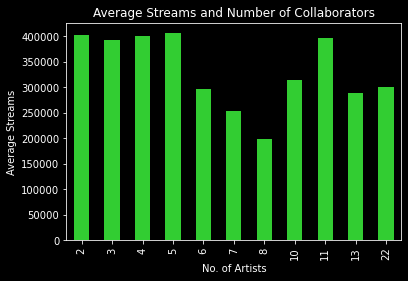

In [7]:
streams_collaborators = (
    collab_data[['Date', 'Track URI2', 'No. of Artists', 'Streams']]
    .drop_duplicates()
    .groupby(["No. of Artists"])["Streams"]
    .mean()
    .reset_index(name="Streams")
    .sort_values(by="No. of Artists", ascending= True)
    .plot.bar(x="No. of Artists", y="Streams", color = main_color)
)
streams_collaborators.set_facecolor(bg_color)
streams_collaborators.get_legend().remove()
streams_collaborators.set_xlabel("No. of Artists")
streams_collaborators.set_ylabel("Average Streams")
streams_collaborators.set_title("Average Streams and Number of Collaborators")

#### Revenue

Text(0.5, 1.0, 'Average Revenue and Number of Collaborators')

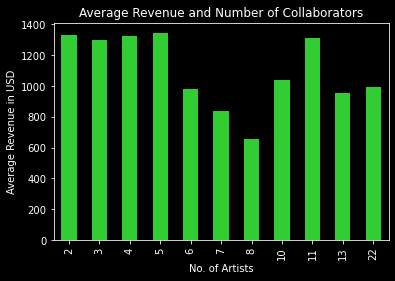

In [8]:
revenue_collaborators = (
    collab_data[['Date', 'Track URI2', 'No. of Artists', 'Revenue']]
    .drop_duplicates()
    .groupby(["No. of Artists"])["Revenue"]
    .mean()
    .reset_index(name="Revenue")
    .sort_values(by="No. of Artists", ascending= True)
    .plot.bar(x="No. of Artists", y="Revenue", color = main_color)
)
revenue_collaborators.set_facecolor(bg_color)
revenue_collaborators.get_legend().remove()
revenue_collaborators.set_xlabel("No. of Artists")
revenue_collaborators.set_ylabel("Average Revenue in USD")
revenue_collaborators.set_title("Average Revenue and Number of Collaborators")

For average streams and revenue, we observe a very similar pattern. There seem to be no apparent pattern between 2 - 5 artists, however, beyond this point, tracks with more artists tend to attain fewer streams/revenue per day on average. 

### 1.2 Genre Metrics

Things to consider here:
- Average may be affecting which genres are in the top. 
- We could potentially do some other data manipulation here to make artificial graphs. 
    - Do some data processing to decide on top 5 and then just display those genres... artifical static data. 
- Also, we have duplicated data due to artists appearing multiple times based on their genres... 
    - Not sute how to fix this due to the fundamental nature of our data collection. 


#### Count

Text(0.5, 1.0, 'Top 5 Genres and Count in Dataset')

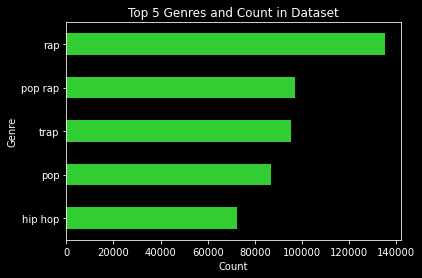

In [9]:
count_genres = (
    collab_genres
    .groupby(["Artist Genre"])
    .count()
    .reset_index()
    .sort_values(by="Artist Name", ascending= False)
    .head(5)
    .plot.barh(x="Artist Genre", y="Artist Name", color = main_color)
)

count_genres.set_facecolor(bg_color)
count_genres.get_legend().remove()
count_genres.invert_yaxis()
count_genres.set_xlabel("Count")
count_genres.set_ylabel("Genre")
count_genres.set_title("Top 5 Genres and Count in Dataset")

This chart shows the top 5 most frequently occurring genres from artists that participate in collaborations. Rap is the most common genre in our dataset, followed by pop rap, trap, pop, and hip hop. It is important to note that many artists are associated with more than one genres (so an artist could be counted as both rap and pop rap, for instance). 

#### Position

Text(0.5, 1.0, 'Top 5 Genres and Average Position')

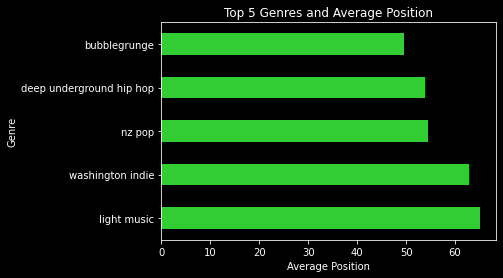

In [10]:
position_genres = (
    collab_genres
    .groupby(["Artist Genre"])["Position"]
    .mean()
    .reset_index(name="Position")
    .sort_values(by="Position", ascending= True)
    .head(5)
    .plot.barh(x="Artist Genre", y="Position", color = main_color)
)
position_genres.set_facecolor(bg_color)
position_genres.get_legend().remove()
position_genres.invert_yaxis()
position_genres.set_xlabel("Average Position")
position_genres.set_ylabel("Genre")
position_genres.set_title("Top 5 Genres and Average Position")

This chart shows the top 5 genres that have the lowest average position (highest-ranking on the chart). If this seems counterintuitive, it may be helpful to keep in mind that the top 5 most *frequently* ocurring genres in the US Top 200 are rap, pop rap, trap, pop, and hip hop. 

This is probably due to the fact that genres like rap and pop are very common and can occur at any position in the chart (top or bottom), which would pull the average position of those genres down. On the other hand, more esoteric genres are less likely to occur, and as such are less likely to have their average positions diluted. If a very popular song happens to be associated with this "estoeric" genre, then that song's popular record is less likely to be averaged out.

It is also important to note that on Spotify, genre information is associated with a particular artist, not a track. Therefore, this graph shows the genres of artists, not necessarily of the track itself.

#### Streams

Text(0.5, 1.0, 'Top 5 Genres and Average Streams')

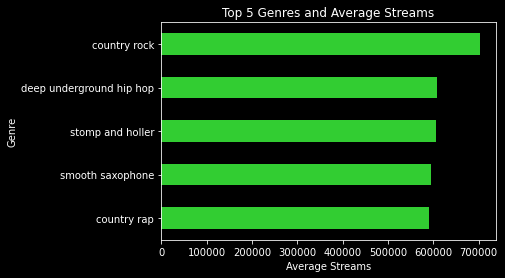

In [11]:
streams_genres = (
    collab_genres.groupby(["Artist Genre"])["Streams"]
    .mean()
    .reset_index(name="Streams")
    .sort_values(by="Streams", ascending= False)
    .head(5)
    .plot.barh(x="Artist Genre", y="Streams", color = main_color)
)
streams_genres.set_facecolor(bg_color)
streams_genres.get_legend().remove()
streams_genres.invert_yaxis()
streams_genres.set_xlabel("Average Streams")
streams_genres.set_ylabel("Genre")
streams_genres.set_title("Top 5 Genres and Average Streams")

When ranking by average streams or revenue, the top 5 genres are country rock, deep underground hip hop, stomp and holler, smooth saxophone, and queer country. 

#### Revenue

Text(0.5, 1.0, 'Top 5 Genres and Average Revenue')

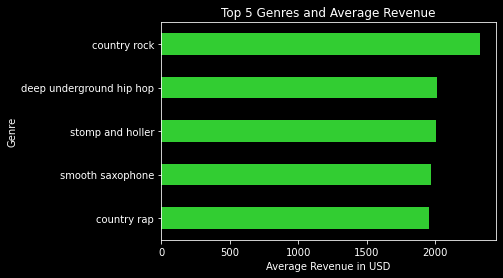

In [12]:
revenue_genres = (
    collab_genres.groupby(["Artist Genre"])["Revenue"]
    .mean()
    .reset_index(name="Revenue")
    .sort_values(by="Revenue", ascending= False)
    .head(5)
    .plot.barh(x="Artist Genre", y="Revenue", color = main_color)
)
revenue_genres.set_facecolor(bg_color)
revenue_genres.get_legend().remove()
revenue_genres.invert_yaxis()
revenue_genres.set_xlabel("Average Revenue in USD")
revenue_genres.set_ylabel("Genre")
revenue_genres.set_title("Top 5 Genres and Average Revenue")

### 1.3 Position And Metrics

#### Streams and Position

Text(0.5, 1.0, 'Position Compared to Streams')

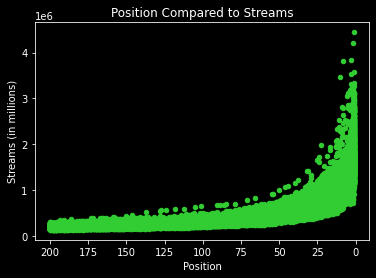

In [13]:
streams_position = (
    collab_data[['Date', 'Track URI2', "Revenue", "Position", 'Streams']]
    .drop_duplicates()
    .plot.scatter(x="Position", y="Streams", color=main_color)
)
streams_position.invert_xaxis()
streams_position.set_xlabel("Position")
streams_position.set_ylabel("Streams (in millions)")
streams_position.set_facecolor(bg_color)
streams_position.set_title("Position Compared to Streams")

This chart shows the relationship between streams and position on the chart. By construction, tracks with higher streams are ranked higher on the chart, so this is a good sanity check for our data. Additionally, there is a large range in streams in tracks on the very top positions, while tracks crowded at the bottom do not show as drastic a difference in streams from each other.

#### Revenue and Position

Text(0.5, 1.0, 'Position Compared to Revenue')

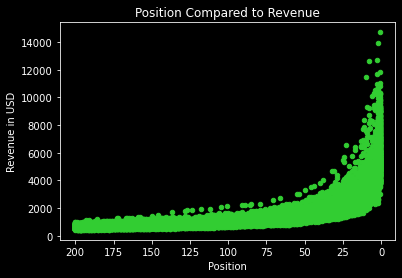

In [14]:
revenue_position = (
    collab_data[['Date', 'Track URI2', "Revenue", "Position", 'Streams']]
    .drop_duplicates()
    .plot.scatter(x="Position", y="Revenue", color=main_color)
)
revenue_position.invert_xaxis()
revenue_position.set_xlabel("Position")
revenue_position.set_ylabel("Revenue in USD") 
revenue_position.set_facecolor(bg_color)
revenue_position.set_title("Position Compared to Revenue")

Similarly, we observe the same trend with revenue and position, as streams and revenue are perfectly correlated.

#### Streams and Position - Average

Text(0.5, 1.0, 'Position Compared to Average Streams')

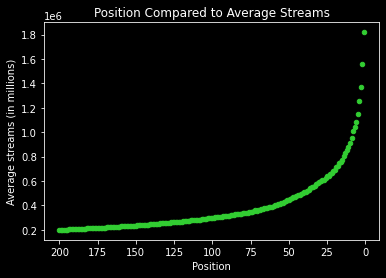

In [15]:
average_streams_position = (
    collab_data[['Date', 'Track URI2', "Revenue", "Position", 'Streams']]
    .drop_duplicates()
    .groupby(["Position"])["Streams"]
    .mean()
    .reset_index()
    .plot.scatter(x="Position", y="Streams", color=main_color)
)

average_streams_position.invert_xaxis()
average_streams_position.set_xlabel("Position")
average_streams_position.set_ylabel("Average streams (in millions)")
average_streams_position.set_facecolor(bg_color)
average_streams_position.set_title("Position Compared to Average Streams")

This chart shows the average number of daily streams for each position on the chart. Again, we see the same  correlation between these two variables as in the previous chart. Additionally, we can see that the average number of streams tend to vary more between the top 10 songs than between the bottom 10 songs; i.e. songs at the bottom of the Top 200 Chart tend to be closer in streams than songs at the top of the chart.

#### Revenue and Position - Average

Text(0.5, 1.0, 'Position Compared To Average Revenue')

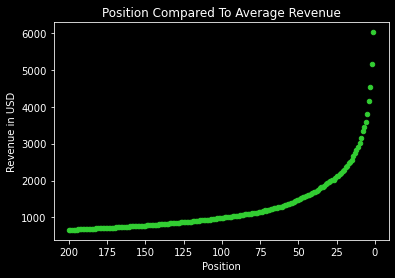

In [16]:
average_revenue_position = (
    collab_data[['Date', 'Track URI2', "Revenue", "Position", 'Streams']]
    .drop_duplicates()
    .groupby(["Position"])["Revenue"]
    .mean()
    .reset_index()
    .plot.scatter(x="Position", y="Revenue", color=main_color)
)

average_revenue_position.invert_xaxis()
average_revenue_position.set_xlabel("Position")
average_revenue_position.set_ylabel("Revenue in USD") 
average_revenue_position.set_facecolor(bg_color)
average_revenue_position.set_title("Position Compared To Average Revenue")

### Look Out For In Future

In [17]:
# coming soon

## Page 2 - Tracks

### Top Collabs

In [18]:
# coming soon

### Track Revenue Over Time

#### Revenue

In [19]:
temp_revenue_top15 = (
    collab_data.groupby(['Track URI2'])['Revenue']
    .mean()
    .reset_index()
    .sort_values(by='Revenue', ascending = False)
    .head(15)
)

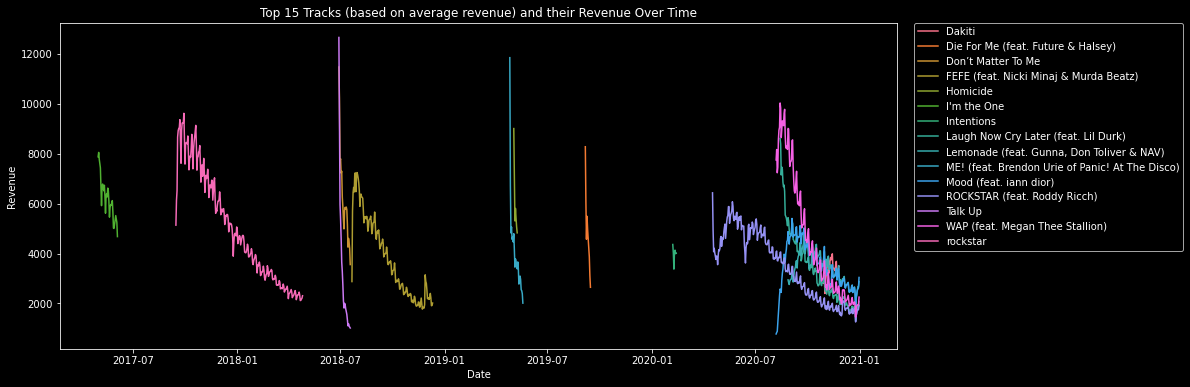

In [20]:
top15_revenue_overtime = (
    collab_data[collab_data['Track URI2'].isin(list(temp_revenue_top15['Track URI2']))]
    .groupby(['Track Name', 'Date'])['Revenue']
    .mean()
    .reset_index()
)

plt.figure(figsize=(15, 6))
sns.lineplot(x="Date", y="Revenue", hue='Track Name', data=top15_revenue_overtime)
plt.title('Top 15 Tracks (based on average revenue) and their Revenue Over Time')
plt.ylabel('Revenue')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)
plt.show()

This chart shows the change in daily revenue of the top 15 songs with the highest average revenue over their lifetimes. There are a few notable observations here:
- the top 15 songs tend to be relatively spaced out between 2017 - early 2020. However, in late 2020, we see several contenders simultaneously.
- almost all tracks show the same pattern: peaking in the first couple of days being on the chart, and then  declining over time. However, some songs have longer lifetimes than others.
- their decline is not smooth or steady, however; they follow an almost periodic pattern: rising and then falling, but on average, trending downwards.

### Top Tracks Over Time

#### Position

In [21]:
temp_position_top15 = (
    collab_data.groupby(['Track URI2'])['Position']
    .mean()
    .reset_index()
    .sort_values(by='Position', ascending = True)
    .head(15)
)

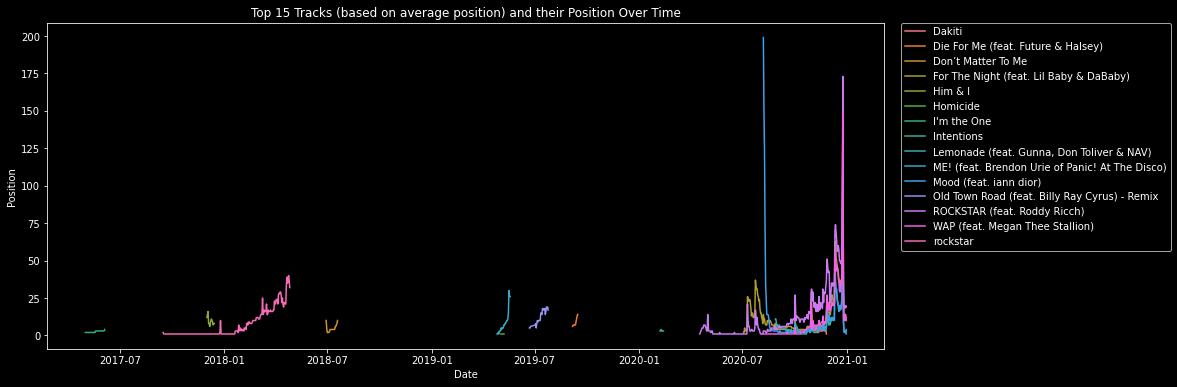

In [22]:
top15_position_overtime = (
    collab_data[collab_data['Track URI2'].isin(list(temp_position_top15['Track URI2']))]
    .groupby(['Track Name', 'Date'])['Position']
    .mean()
    .reset_index()
)

plt.figure(figsize=(15, 6))
sns.lineplot(x="Date", y="Position", hue='Track Name', data=top15_position_overtime)
plt.title('Top 15 Tracks (based on average position) and their Position Over Time')
plt.ylabel('Position')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)
plt.show()

This chart shows the change in daily position for the top 15 songs with the highest (lowest in value) average positions over their lifetimes. Again, we see similar patterns:
- the majority of these songs reach their peak on the chart in their first couple of days, and then gradually fell lower in the chart before dropping out completely.
- some songs have longer lifetimes than others.
- in late 2020, we see several of these 15 tracks peaking simultaneously.

#### Streams

In [23]:
temp_streams_top15 = (
    collab_data.groupby(['Track URI2'])['Streams']
    .mean()
    .reset_index()
    .sort_values(by='Streams', ascending = False)
    .head(15)
)

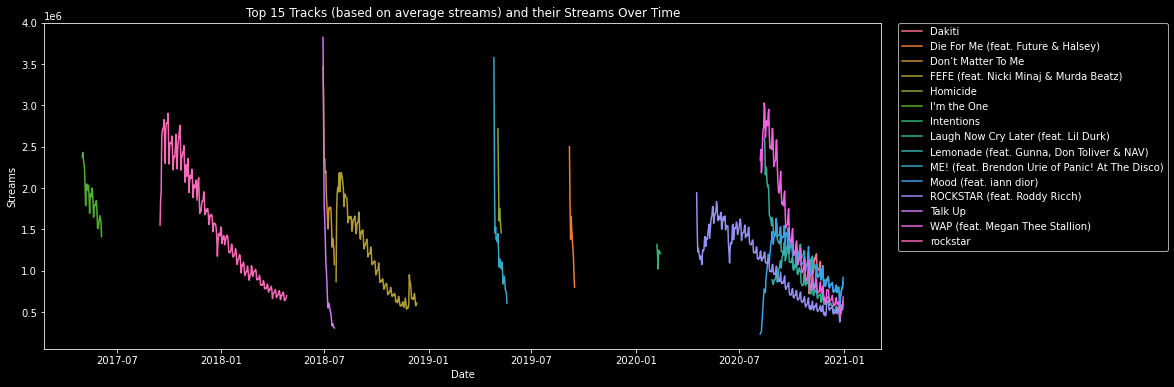

In [24]:
top15_streams_overtime = (
    collab_data[collab_data['Track URI2'].isin(list(temp_streams_top15['Track URI2']))]
    .groupby(['Track Name', 'Date'])['Streams']
    .mean()
    .reset_index()
)

plt.figure(figsize=(15, 6))
sns.lineplot(x="Date", y="Streams", hue='Track Name', data=top15_streams_overtime)
plt.title('Top 15 Tracks (based on average streams) and their Streams Over Time')
plt.ylabel('Streams')
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0)
plt.show()

This chart is identical to the change in revenue, except the y-axis shows the daily nubmer of streams.

## Page 3 - Artists

### Top Artists

#### Count

Text(0.5, 1.0, 'Top 5 Artists and Count in Dataset')

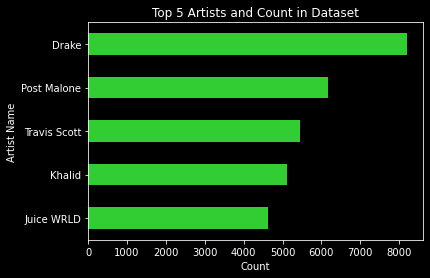

In [25]:
count_artists = (
    collab_data
    .groupby(["Artist Name"])
    .count()
    .reset_index()
    .sort_values(by="Track Name", ascending= False)
    .head(5)
    .plot.barh(x="Artist Name", y="Track Name", color = main_color)
)

#count_artists

count_artists.set_facecolor(bg_color)
count_artists.get_legend().remove()
count_artists.invert_yaxis()
count_artists.set_xlabel("Count")
count_artists.set_ylabel("Artist Name")
count_artists.set_title("Top 5 Artists and Count in Dataset")

The five most frequently occuring artists on the US Top 200 Charts that are also involved in collaborations are: Drake, Post Malone, Travis Scott, Khalid, and Juice WRLD. These artists predominantly come from pop and/or rap, which is consistent with the chart showing the most frequently occuring genres.

#### Position

Text(0.5, 1.0, 'Top 5 Artists and Average Position')

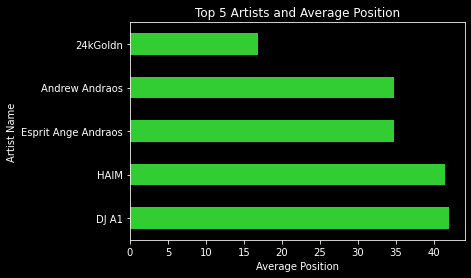

In [26]:
position_artists = (
    collab_data.groupby(["Artist Name"])["Position"]
    .mean()
    .reset_index(name="Position")
    .sort_values(by="Position", ascending= True)
    .head(5)
    .plot.barh(x="Artist Name", y="Position", color = main_color)
)
position_artists.set_facecolor(bg_color)
position_artists.get_legend().remove()
position_artists.invert_yaxis()
position_artists.set_xlabel("Average Position")
position_artists.set_ylabel("Artist Name")
position_artists.set_title("Top 5 Artists and Average Position")

When ranking by average position, the top 5 highest-ranking artists are: 24kGoldn, Andrew Androas, Esprit Ange Andraos, HAIM and DJ A1. 

#### Streams

Text(0.5, 1.0, 'Top 5 Artists and Average Streams')

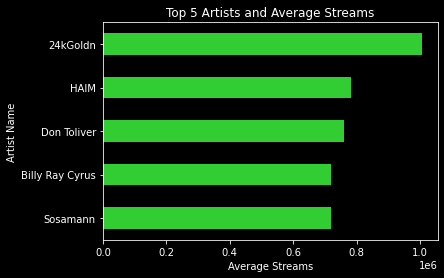

In [27]:
streams_artists = (
    collab_data.groupby(["Artist Name"])["Streams"]
    .mean()
    .reset_index(name="Streams")
    .sort_values(by="Streams", ascending= False)
    .head(5)
    .plot.barh(x="Artist Name", y="Streams", color = main_color)
)
streams_artists.set_facecolor(bg_color)
streams_artists.get_legend().remove()
streams_artists.invert_yaxis()
streams_artists.set_xlabel("Average Streams")
streams_artists.set_ylabel("Artist Name")
streams_artists.set_title("Top 5 Artists and Average Streams")

We get a smilar set of top ranking artists when sorted by Average streams. New artists here include Billy Ray Cyrus, Don Toliver and Sosamann. 

#### Revenue

Text(0.5, 1.0, 'Top 5 Artists and Average Revenue')

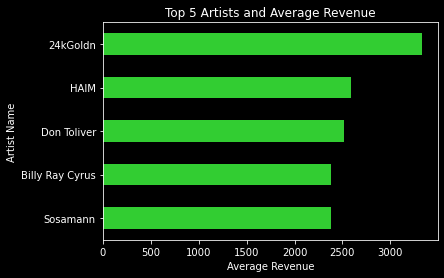

In [28]:
revenue_artists = (
    collab_data.groupby(["Artist Name"])["Revenue"]
    .mean()
    .reset_index(name="Revenue")
    .sort_values(by="Revenue", ascending= False)
    .head(5)
    .plot.barh(x="Artist Name", y="Revenue", color = main_color)
)
revenue_artists.set_facecolor(bg_color)
revenue_artists.get_legend().remove()
revenue_artists.invert_yaxis()
revenue_artists.set_xlabel("Average Revenue")
revenue_artists.set_ylabel("Artist Name")
revenue_artists.set_title("Top 5 Artists and Average Revenue")

### Top Artists in Top Genres

In [29]:
# coming soon

### Audio Features

In [30]:
# coming soon

## Page 4 - Legacy (factors related to an artist's history on the chart)

### Track Days On Chart

Track Days on Chart is a variable we constructed based on the Chart's historical data. This variable changes at a daily level, and indicates how many days a track has appeared from its first appearance up to and including the date in any given row. It does not necessarily indicate any consecutive streak: if "WAP" was on the chart on Monday, Tuesday, and Thursday, then on Thursday, then its "Track_days_onchart" variable would be 3. 

#### Count

In [31]:
count_trackdays_temp = (
    collab_data[['Date', 'Track URI2', 'Song_days_onchart']]
    .drop_duplicates()
    .groupby(['Track URI2'])
    .agg(Max_days_onchart = ('Song_days_onchart', 'max'))
    .sort_values(by='Max_days_onchart', ascending=False)
    .reset_index()
)

count_trackdays_temp['Max_days_onchart'].describe()

count    2545.000000
mean       47.398821
std       100.774287
min         1.000000
25%         2.000000
50%         8.000000
75%        42.000000
max      1166.000000
Name: Max_days_onchart, dtype: float64

Text(0.5, 1.0, 'Frequency of Days Spent on the Chart')

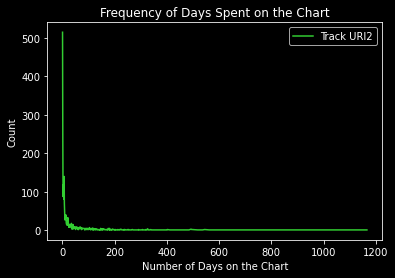

In [32]:
count_trackdays = (
    count_trackdays_temp
    .drop_duplicates('Track URI2')
    .groupby(['Max_days_onchart'])
    .count()
    .reset_index()
    .plot.line(x="Max_days_onchart", y="Track URI2", color=main_color)
)
#count_trackdays
count_trackdays.set_xlabel("Number of Days on the Chart")
count_trackdays.set_ylabel("Count")
count_trackdays.set_facecolor(bg_color)
count_trackdays.set_title("Frequency of Days Spent on the Chart")

In [33]:
len(collab_data['Track URI2'].unique())

2545

This chart shows the frequency of the length of time tracks spend on the chart (each observation is a unique track).
There are 2545 unique songs in our dataset. Of these, a very large number of songs (upwards of 500) only spend a couple of days on the chart.This number quickly declines as we move across the x-axis.
The median number of days spent on the chart is 8, and the 75th percentile is 42 days. There are a limited number of very popular songs that spend upwards of 1000 days on the chart, which skews the mean number of days spent on the chart upwards.

#### Position

Text(0.5, 1.0, 'Days on the Chart Compared to the Position')

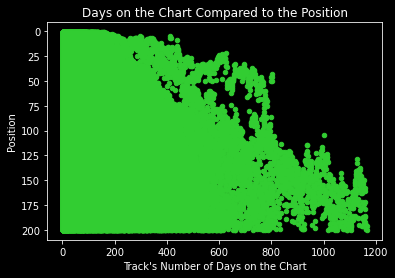

In [34]:
position_trackdays = (
    collab_data[['Date', 'Track URI2', "Song_days_onchart", "Revenue", "Position", 'Streams']]
    .drop_duplicates()
    .plot.scatter(x="Song_days_onchart", y="Position", color=main_color)
)
position_trackdays.invert_yaxis()
position_trackdays.set_xlabel("Track's Number of Days on the Chart")
position_trackdays.set_ylabel("Position")
position_trackdays.set_facecolor(bg_color)
position_trackdays.set_title("Days on the Chart Compared to the Position")

The above graph shows the position of songs on the chart depending on the number of days it has been at the chart. It is important to note that the same track can appear multiple times on this graph (e.g. if a song is on the chart for 8 days, then we will see 8 points on this graph corresponding to that song, one for each day, and each with a slightly different position).  

The takeaway is that songs that have been on the chart for more days tend to be lower on the chart, while songs that have been on the chart for less than 200 days could be anywhere on the chart.

#### Streams

Text(0.5, 1.0, 'Days on the Chart Compared to the Number of Streams')

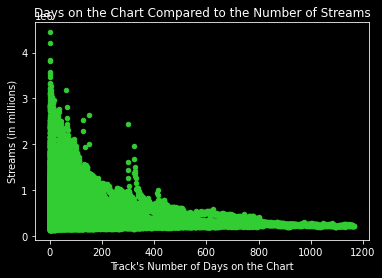

In [35]:
streams_trackdays = (
    collab_data[['Date', 'Track URI2', "Song_days_onchart", "Revenue", "Position", 'Streams']]
    .drop_duplicates()
    .plot.scatter(x="Song_days_onchart", y="Streams", color=main_color)
)
streams_trackdays.set_xlabel("Track's Number of Days on the Chart")
streams_trackdays.set_ylabel("Streams (in millions)")
streams_trackdays.set_facecolor(bg_color)
streams_trackdays.set_title("Days on the Chart Compared to the Number of Streams")

Likewise, for both streams and revenue, the longer tracks stay on the chart, the lower their number of streams and revenue tend to be. However, when songs have been on the chart for less than ~100 days, their number of streams and revenue can vary greatly.

#### Revenue

Text(0.5, 1.0, 'Days on the Chart Compared to Revenue')

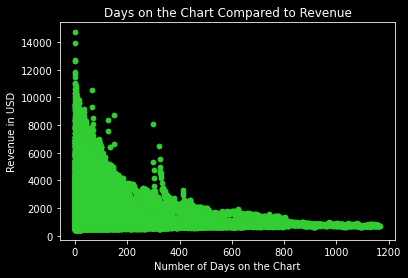

In [36]:
revenue_trackdays = (
    collab_data
    .plot.scatter(x="Song_days_onchart", y="Revenue", color=main_color)
)
revenue_trackdays.set_xlabel("Number of Days on the Chart")
revenue_trackdays.set_ylabel("Revenue in USD")
revenue_trackdays.set_facecolor(bg_color)
revenue_trackdays.set_title("Days on the Chart Compared to Revenue")

#### Position Average

Text(0.5, 1.0, 'Track Days On Chart Compared To Average Position')

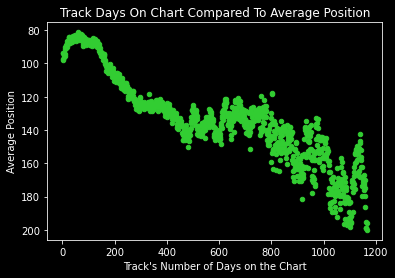

In [37]:
average_position_trackdays = (
    collab_data[['Date', 'Track URI2', "Revenue", "Position", 'Streams', 'Song_days_onchart']]
    .drop_duplicates()
    .groupby(["Song_days_onchart"])["Position"]
    .mean()
    .reset_index()
    .plot.scatter(x="Song_days_onchart", y="Position", color=main_color)
)
average_position_trackdays.invert_yaxis()
average_position_trackdays.set_xlabel("Track's Number of Days on the Chart")
average_position_trackdays.set_ylabel("Average Position") 
average_position_trackdays.set_facecolor(bg_color)
average_position_trackdays.set_title("Track Days On Chart Compared To Average Position")

When averaging position and plotting against the track's number of days on the chart, we can make two observations: in the first few days, the song tends to climb higher on the chart; secondly, having reached this peak, the longer the track stays on the chart, the lower the average streams tend to be. This is consistent with out previous (unaveraged) chart.

#### Streams Average

Text(0.5, 1.0, 'Track Days On Chart Compared To Average Streams')

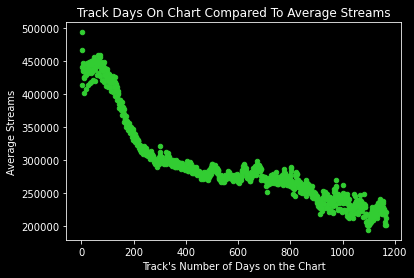

In [38]:
average_streams_trackdays = (
    collab_data[['Date', 'Track URI2', "Revenue", "Position", 'Streams', 'Song_days_onchart']]
    .drop_duplicates()
    .groupby(["Song_days_onchart"])["Streams"]
    .mean()
    .reset_index()
    .plot.scatter(x="Song_days_onchart", y="Streams", color=main_color)
)
average_streams_trackdays.set_xlabel("Track's Number of Days on the Chart")
average_streams_trackdays.set_ylabel("Average Streams") 
average_streams_trackdays.set_facecolor(bg_color)
average_streams_trackdays.set_title("Track Days On Chart Compared To Average Streams")

When averaging by number of streams (and revenue, as seen below), we observe a similar pattern as before, however the tail (songs with more days on the chart) is less noisy than in the previous chart.

#### Revenue Average

Text(0.5, 1.0, 'Track Days On Chart Compared To Average Revenue')

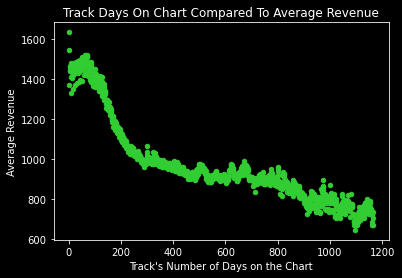

In [39]:
average_revenue_trackdays = (
    collab_data[['Date', 'Track URI2', "Revenue", "Position", 'Streams', 'Song_days_onchart']]
    .drop_duplicates()
    .groupby(["Song_days_onchart"])["Revenue"]
    .mean()
    .reset_index()
    .plot.scatter(x="Song_days_onchart", y="Revenue", color=main_color)
)
average_revenue_trackdays.set_xlabel("Track's Number of Days on the Chart")
average_revenue_trackdays.set_ylabel("Average Revenue") 
average_revenue_trackdays.set_facecolor(bg_color)
average_revenue_trackdays.set_title("Track Days On Chart Compared To Average Revenue")

### Artist Days On Chart

Artist Days on Chart is a variable we constructed based on the Chart's historical data. This variable changes at a daily level, and indicates how many days an artist has appeared from their first appearance up to and including the date in any given row. It does not necessarily indicate any consecutive streak: if Selena Gomez was on the chart on Monday, Tuesday, and Thursday, then on Thursday, her "Artist_days_onchart" variable would be 3. 

#### Position

Text(0.5, 1.0, 'Artist Days on the Chart Compared to the Position')

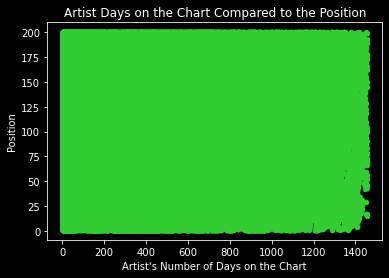

In [40]:
position_artistdays = (
    collab_data
    .plot.scatter(x="Artist_days_onchart", y="Position", color=main_color)
)
position_artistdays.set_xlabel("Artist's Number of Days on the Chart")
position_artistdays.set_ylabel("Position")
position_artistdays.set_facecolor(bg_color)
position_artistdays.set_title("Artist Days on the Chart Compared to the Position")

There seems to be no pattern between the artist's number of days on the chart and the position reached by the song. Regardless of how long a history an artist has on the chart, the track could occupy any position on the chart.

#### Streams

Text(0.5, 1.0, 'Artist Days on the Chart Compared to Streams')

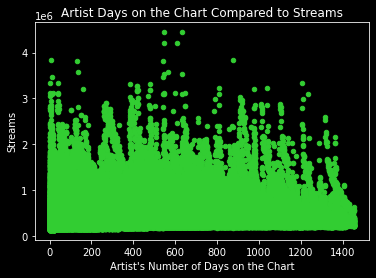

In [41]:
streams_artistdays = (
    collab_data
    .plot.scatter(x="Artist_days_onchart", y="Streams", color=main_color)
)
streams_artistdays.set_xlabel("Artist's Number of Days on the Chart")
streams_artistdays.set_ylabel("Streams")
streams_artistdays.set_facecolor(bg_color)
streams_artistdays.set_title("Artist Days on the Chart Compared to Streams")

#### Revenue

Text(0.5, 1.0, 'Artist Days on the Chart Compared to Revenue')

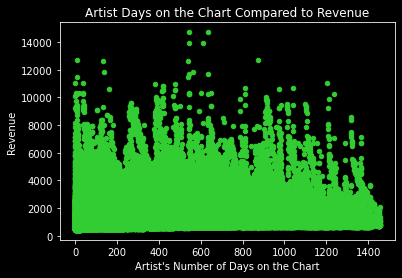

In [42]:
revenue_artistdays = (
    collab_data
    .plot.scatter(x="Artist_days_onchart", y="Revenue", color=main_color)
)
revenue_artistdays.set_xlabel("Artist's Number of Days on the Chart")
revenue_artistdays.set_ylabel("Revenue")
revenue_artistdays.set_facecolor(bg_color)
revenue_artistdays.set_title("Artist Days on the Chart Compared to Revenue")

#### Position Average

Text(0.5, 1.0, 'Artist Days On Chart Compared To Average Position')

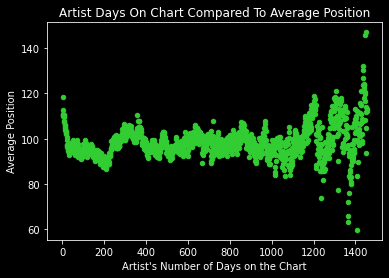

In [43]:
average_position_artistdays = (
    collab_data.groupby(["Artist_days_onchart"])["Position"]
    .mean()
    .reset_index()
    .plot.scatter(x="Artist_days_onchart", y="Position", color=main_color)
)
average_position_artistdays.set_xlabel("Artist's Number of Days on the Chart")
average_position_artistdays.set_ylabel("Average Position") 
average_position_artistdays.set_facecolor(bg_color)
average_position_artistdays.set_title("Artist Days On Chart Compared To Average Position")

When averaging by positions, there seems to be no clear pattern between average position and an artist's number of days on the chart. In fact, the average position tends to cluster around the midpoint of the chart (100), regardless of how many days the artist has been on the chart. 

#### Streams Average

Text(0.5, 1.0, 'Artist Days On Chart Compared To Average Streams')

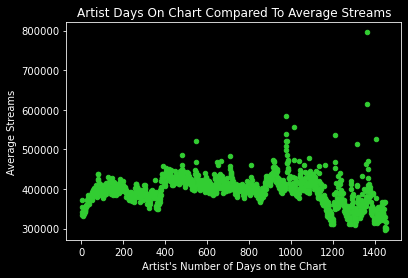

In [44]:
average_streams_artistdays = (
    collab_data.groupby(["Artist_days_onchart"])["Streams"]
    .mean()
    .reset_index()
    .plot.scatter(x="Artist_days_onchart", y="Streams", color=main_color)
)
average_streams_artistdays.set_xlabel("Artist's Number of Days on the Chart")
average_streams_artistdays.set_ylabel("Average Streams") 
average_streams_artistdays.set_facecolor(bg_color)
average_streams_artistdays.set_title("Artist Days On Chart Compared To Average Streams")

#### Revenue Average

Text(0.5, 1.0, 'Artist Days On Chart Compared To Average Revenue')

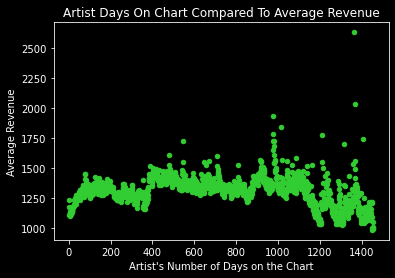

In [45]:
average_revenue_artistdays = (
    collab_data.groupby(["Artist_days_onchart"])["Revenue"]
    .mean()
    .reset_index()
    .plot.scatter(x="Artist_days_onchart", y="Revenue", color=main_color)
)
average_revenue_artistdays.set_xlabel("Artist's Number of Days on the Chart")
average_revenue_artistdays.set_ylabel("Average Revenue") 
average_revenue_artistdays.set_facecolor(bg_color)
average_revenue_artistdays.set_title("Artist Days On Chart Compared To Average Revenue")

Likewise, when averaging by streams and revenue, also observe no clear pattern between artist's number of days on the chart and average revenue/streams.

### Combined Artist Days On Chart

#### Position

In [46]:
# coming soon

#### Streams

In [47]:
# coming soon

#### Revenue

In [48]:
# coming soon

## Page 5 - Deeper information

### Album Release Factors - Month

Album Release Dates are obtained from Spotify's API. Using each track's unique URI, we identify the album to which it belongs, and consequently, the date on which that album was released. There are a few caveats for this variabe:
- Sometimes, a track is released first as a single, and then as part of a larger album. In this event, the data we obtain would come from the album, not the single.
- Spotify is not always able to pinpoint precisely the release date-- sometimes, this variable is only accurate to the closest week or month.

#### Count

Text(0.5, 1.0, 'Release Month and Count in Dataset')

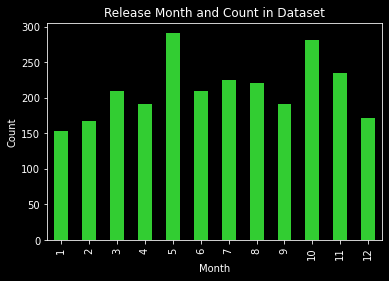

In [49]:
count_month = (
    collab_data.drop_duplicates('Track URI2')
    .groupby(['Album_release_month'])
    .count()
    .reset_index()
    .sort_values(by='Album_release_month', ascending = True)
    .plot.bar(x= "Album_release_month", y = "Track URI2", color = main_color)  
)

count_month.get_legend().remove()
count_month.set_xlabel("Month")
count_month.set_ylabel("Count")
count_month.set_facecolor(bg_color)
count_month.set_title("Release Month and Count in Dataset") 

This chart shows the frequency of release months for each track in the data (each observation is a track, not a track on any particular day). The most common months of release tend to be May and October, presumably as the general public gets ready for the holidays or vacation time. 

#### Position

Text(0.5, 1.0, 'Release Month and Chart Position')

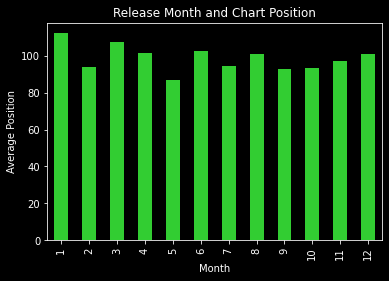

In [50]:
position_month = (
    collab_data.drop_duplicates('Track URI2')
    .groupby(['Album_release_month'])['Position']
    .mean()
    .reset_index()
    .sort_values(by='Album_release_month', ascending = True)
    .plot.bar(x= "Album_release_month", y = "Position", color = main_color)  
)

position_month.get_legend().remove()
# position_month.invert_yaxis()
position_month.set_xlabel("Month")
position_month.set_ylabel("Average Position")
position_month.set_facecolor(bg_color)
position_month.set_title("Release Month and Chart Position") 

This chart shows the position attained on the first day on the chart by each track, compared against that track's release month. Again, tracks that are release in May tend to reach higher positions on their first day.

#### Streams

Text(0.5, 1.0, 'Release Month and Streams')

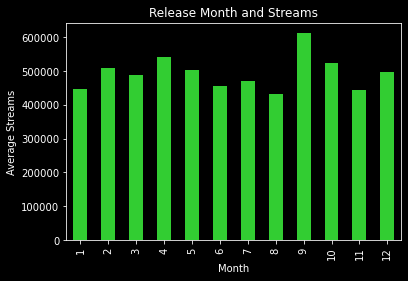

In [51]:
streams_month = (
    collab_data.drop_duplicates('Track URI2')
    .groupby(['Album_release_month'])['Streams']
    .mean()
    .reset_index()
    .sort_values(by='Album_release_month', ascending = True)
    .plot.bar(x= "Album_release_month", y = "Streams", color = main_color)  
)

streams_month.get_legend().remove()
streams_month.set_xlabel("Month")
streams_month.set_ylabel("Average Streams")
streams_month.set_facecolor(bg_color)
streams_month.set_title("Release Month and Streams") 

This chart shows the streams attained on the first day on the chart by each track, compared against that track's release month. Tracks that are release in September tend to get higher streams on their first day.

#### Revenue

Text(0.5, 1.0, 'Release Month and Revenue')

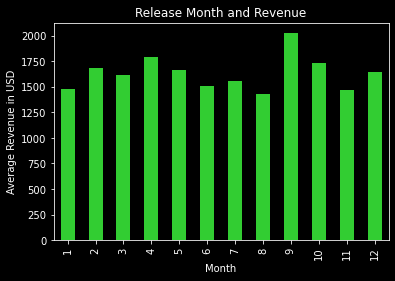

In [52]:
revenue_month = (
    collab_data.drop_duplicates('Track URI2')
    .groupby(['Album_release_month'])['Revenue']
    .mean()
    .reset_index()
    .sort_values(by='Album_release_month', ascending = True)
    .plot.bar(x= "Album_release_month", y = "Revenue", color = main_color)  
)

revenue_month.get_legend().remove()
revenue_month.set_xlabel("Month")
revenue_month.set_ylabel("Average Revenue in USD")
revenue_month.set_facecolor(bg_color)
revenue_month.set_title("Release Month and Revenue") 

### Album Release Factors - Week

In [53]:
collab_data['Album_release_dayweek'] = pd.Categorical(collab_data['Album_release_dayweek'],
                                                      categories=['Mon', 'Tue', 'Wed', 
                                                                  'Thu', 'Fri', 'Sat', 'Sun'],
                                                      ordered=True)

<ipython-input-53-861b4b54ed05>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  collab_data['Album_release_dayweek'] = pd.Categorical(collab_data['Album_release_dayweek'],


#### Count

Text(0.5, 1.0, 'Release Day and Count in Dataset')

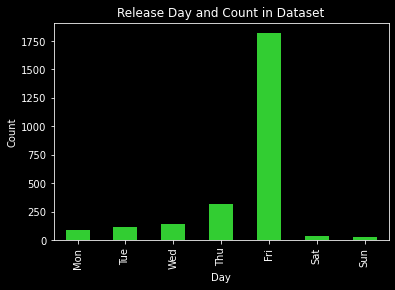

In [54]:
count_week = (
    collab_data.drop_duplicates('Track URI2')
    .groupby(['Album_release_dayweek'])
    .count()
    .reset_index()
    .sort_values(by='Album_release_dayweek', ascending = True)
    .plot.bar(x= 'Album_release_dayweek', y = "Track URI2", color = main_color)  
)

count_week.get_legend().remove()
count_week.set_xlabel("Day")
count_week.set_ylabel("Count")
count_week.set_facecolor(bg_color)
count_week.set_title("Release Day and Count in Dataset") 

This chart shows the frequency of release days of the week. By and large, most tracks are released on a Friday, presumably to get the general public ready for the weekends. Very few tracks are release during the weekend. 

#### Position

Text(0.5, 1.0, 'Release Day and Chart Position')

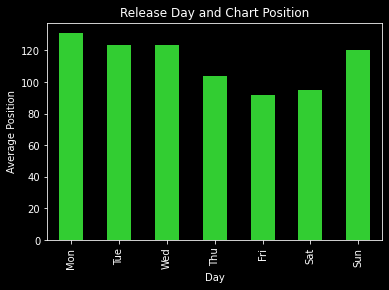

In [55]:
position_week = (
    collab_data.drop_duplicates('Track URI2')
    .groupby(['Album_release_dayweek'])['Position']
    .mean()
    .reset_index()
    .sort_values(by='Album_release_dayweek', ascending = True)
    .plot.bar(x= 'Album_release_dayweek', y = "Position", color = main_color)  
)

position_week.get_legend().remove()
# position_week.invert_yaxis()
position_week.set_xlabel("Day")
position_week.set_ylabel("Average Position")
position_week.set_facecolor(bg_color)
position_week.set_title("Release Day and Chart Position") 

This chart shows the position attained by a track on its first day on the chart, compared against its release day of the week. Again, tracks that are released on a Friday tend to reach a higher position the chart than do tracks released on other days of the week. Tracks released on a Monday tend to be lowest on the chart on average, at well below the midpoint on the Chart.

#### Streams

Text(0.5, 1.0, 'Release Day and Streams')

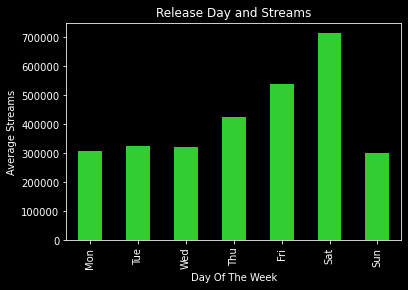

In [56]:
streams_week = (
    collab_data.drop_duplicates('Track URI2')
    .groupby(['Album_release_dayweek'])['Streams']
    .mean()
    .reset_index()
    .sort_values(by='Album_release_dayweek', ascending = True)
    .plot.bar(x= 'Album_release_dayweek', y = 'Streams', color = main_color)  
)

streams_week.get_legend().remove()
streams_week.set_xlabel("Day Of The Week")
streams_week.set_ylabel("Average Streams")
streams_week.set_facecolor(bg_color)
streams_week.set_title("Release Day and Streams") 

We observe a similar trend with both streams and revenue, although the peak occurs slightly later in the week. Tracks released on Saturdays tend, on average, to attain a higher number of streams on their first day on the chart.

#### Revenue

Text(0.5, 1.0, 'Release Day and Revenue')

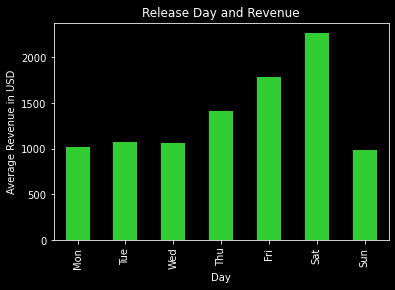

In [57]:
revenue_week = (
    collab_data.drop_duplicates('Track Name')
    .groupby(['Album_release_dayweek'])['Revenue']
    .mean()
    .reset_index()
    .sort_values(by='Album_release_dayweek', ascending = True)
    .plot.bar(x= 'Album_release_dayweek', y = "Revenue", color = main_color)  
)

revenue_week.get_legend().remove()
revenue_week.set_xlabel("Day")
revenue_week.set_ylabel("Average Revenue in USD")
revenue_week.set_facecolor(bg_color)
revenue_week.set_title("Release Day and Revenue") 

## Relationship between streams and the average days on chart of all collaborators involved in the song

In [58]:
data1 = (
    collab_data[['Date', 'Year_chart', 'Track URI2', 
           'No. of Artists', 'Album_release_dayweek',
           'Streams', 'Song_days_onchart', 'Collab_avg_days_onchart']]
    .drop_duplicates()
)

data1['Year_chart_min'] = data1.groupby(['Track URI2'])[['Year_chart']].transform('min')

data2 = data1.groupby('Track URI2')[['Streams']].agg('max').reset_index()\
.merge(data1[['Date', 'Streams', 'Year_chart_min', 'Track URI2', 
               'No. of Artists', 'Album_release_dayweek',
               'Song_days_onchart',
               'Collab_avg_days_onchart']], how='left', on=['Track URI2', 'Streams'])

data2['Log_max_streams'] = np.log(data2['Streams'])
data2['NumArtists'] = data2['No. of Artists']

In [59]:
data2

,Track URI2,Streams,Date,Year_chart_min,No. of Artists,Album_release_dayweek,Song_days_onchart,Collab_avg_days_onchart,Log_max_streams,NumArtists
0,"""42"" - From SR3MM['Rae Sremmurd', 'Swae Lee', ...",297731.0,2018-05-04,2018,3,Fri,1,297.0,12.603946,3
1,"#PROUDCATOWNERREMIX['XXXTENTACION', 'Rico Nasty']",361205.0,2019-08-23,2019,2,Tue,1,469.0,12.797201,2
2,"$$$ - with Matt Ox['XXXTENTACION', 'Matt Ox']",725018.0,2018-03-16,2018,2,Fri,1,207.0,13.493952,2
3,"'Till I Collapse['Eminem', 'Nate Dogg']",286215.0,2018-09-05,2017,2,Sun,248,318.5,12.564499,2
4,(Intro) I'm so Grateful (feat. Sizzla)['DJ Kha...,208805.0,2017-06-23,2017,2,Thu,1,54.5,12.249156,2
...,...,...,...,...,...,...,...,...,...,...
2540,"wokeuplikethis*['Playboi Carti', 'Lil Uzi Vert']",444047.0,2017-05-16,2017,2,Fri,33,84.5,13.003686,2
2541,you were good to me (bonus track)['Jeremy Zuck...,258351.0,2020-04-17,2020,2,Fri,1,84.5,12.462074,2
2542,"you were good to me['Jeremy Zucker', 'Chelsea ...",239256.0,2020-02-26,2019,2,Fri,19,73.5,12.385289,2
2543,"Échame La Culpa['Luis Fonsi', 'Demi Lovato']",472413.0,2017-12-01,2017,2,Fri,15,277.5,13.065609,2


Construct scatter plots with different subsets of years and number of artists

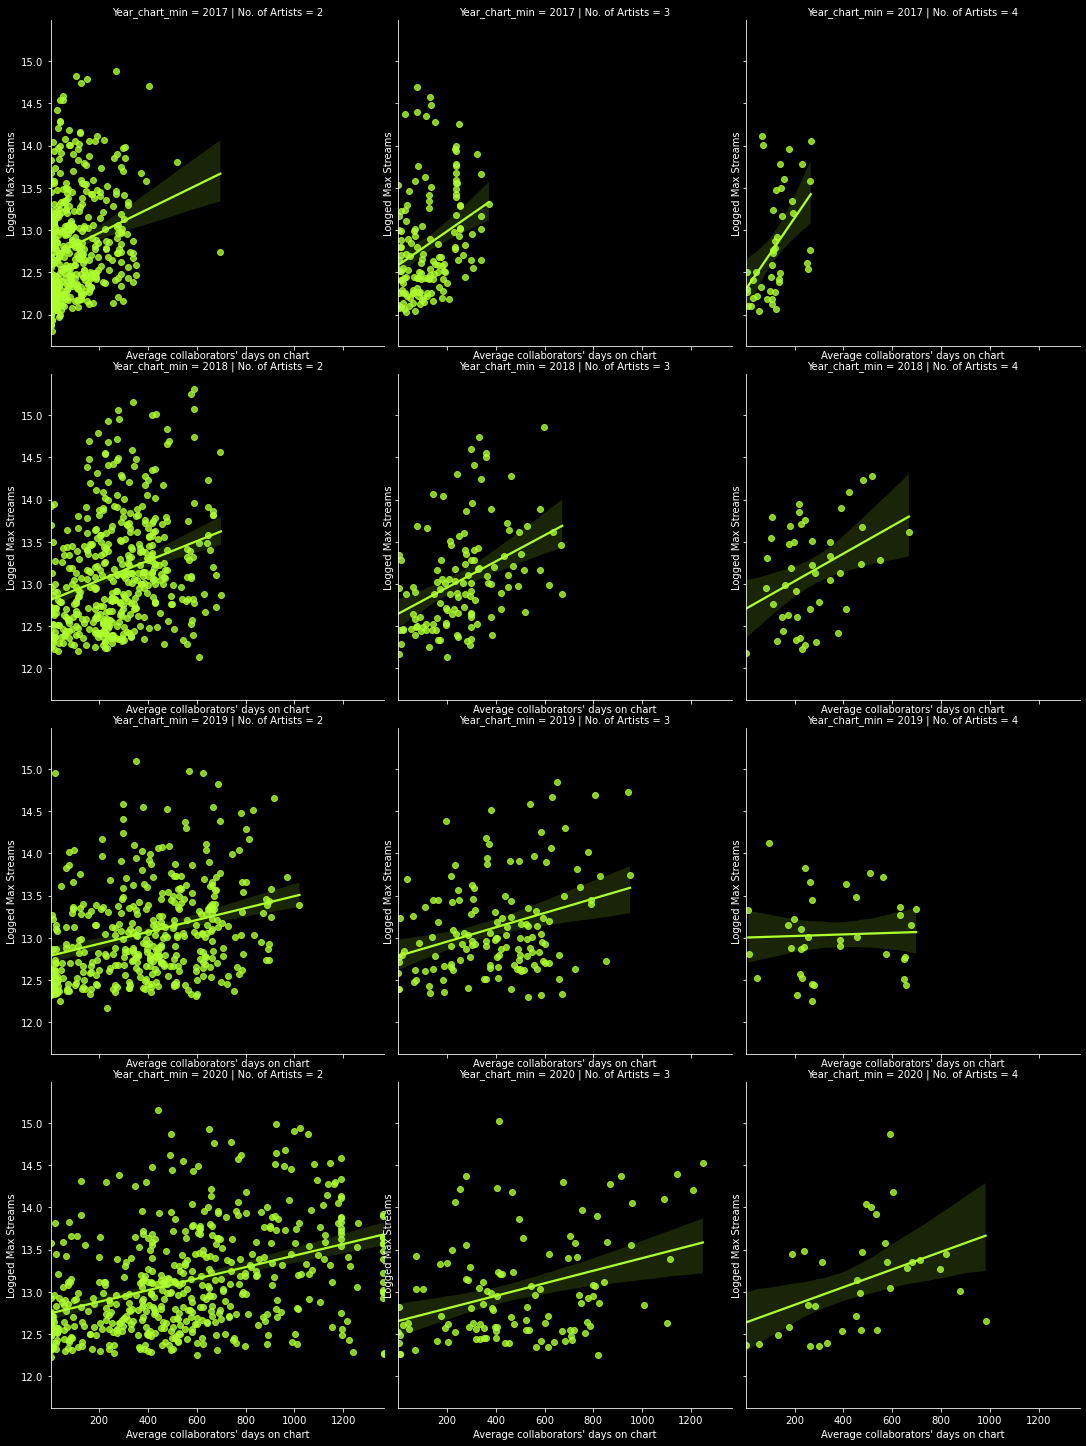

In [60]:
ax = sns.lmplot(data = data2[data2['No. of Artists'].isin([2,3,4])] , 
            x = 'Collab_avg_days_onchart', y = 'Log_max_streams',
            col = 'No. of Artists', row = 'Year_chart_min')

ax.set(xlabel="Average collaborators' days on chart", ylabel='Logged Max Streams')

In [61]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [62]:
m0a = smf.ols(
  formula='Log_max_streams ~ Collab_avg_days_onchart',
  data = data2)\
.fit().get_robustcov_results()

m0a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Log_max_streams   R-squared:                       0.113
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     291.5
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           5.90e-62
Time:                        23:48:13   Log-Likelihood:                -2264.4
No. Observations:                2545   AIC:                             4533.
Df Residuals:                    2543   BIC:                             4544.
Df Model:                           1                                         
Covariance Type:                  HC1                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                  12.7838      0.017    731.818      0.000      12.750      12.818
Collab_avg_days_onchart     0.0007   4.36e-05     17.073      0.000       0.001       0.001
==============================================================================
Omnibus:                      289.286   Durbin-Watson:                   1.912
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              394.543
Skew:                           0.912   Prob(JB):                     2.12e-86
Kurtosis:                       3.630   Cond. No.                         662.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [64]:
m1a = smf.ols(
  formula='Streams ~ Collab_avg_days_onchart',
  data = data2)\
.fit().get_robustcov_results()

m1a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Streams   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.069
Method:                 Least Squares   F-statistic:                     156.7
Date:                Wed, 10 Feb 2021   Prob (F-statistic):           6.15e-35
Time:                        23:48:46   Log-Likelihood:                -36897.
No. Observations:                2545   AIC:                         7.380e+04
Df Residuals:                    2543   BIC:                         7.381e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                4.209e+05   1.25e+04     33.790      0.000    3.97e+05    4.45e+05
Collab_avg_days_onchart   464.1394     37.074     12.519      0.000     391.440     536.838
==============================================================================
Omnibus:                     1634.220   Durbin-Watson:                   1.903
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18252.598
Skew:                           2.951   Prob(JB):                         0.00
Kurtosis:                      14.718   Cond. No.                         662.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [65]:
list_tvalues = []
list_pvalues = []
list_year = []
list_num_artists = []
list_n = []

for i in [2017, 2018, 2019, 2020]:
    for j in [2, 3, 4]:
#         print(i, j)
        reg = smf.ols(
          formula='Log_max_streams ~ Collab_avg_days_onchart',
          data = data2[(data2['Year_chart_min']==i) &
              (data2['No. of Artists']==j)])\
          .fit().get_robustcov_results()
        
        list_tvalues.append(reg.tvalues[1])
        list_pvalues.append(reg.pvalues[1])
        list_year.append(i)
        list_num_artists.append(j)
        list_n.append(reg.nobs)

In [66]:
pd.DataFrame(list(zip(list_year, list_num_artists, list_tvalues, list_pvalues, list_n)),
            columns=['Year', 'No. of Artists', 'Slope t-value', 'Slope p-value', 'Nobs'])

,Year,No. of Artists,Slope t-value,Slope p-value,Nobs
0,2017,2,4.759831,2.645635e-06,435.0
1,2017,3,4.620699,8.417114e-06,146.0
2,2017,4,3.801235,4.590588e-04,44.0
3,2018,2,6.536719,1.693909e-10,456.0
4,2018,3,5.159678,9.712220e-07,124.0
5,2018,4,3.080296,3.598109e-03,45.0
6,2019,2,6.276958,9.202847e-10,392.0
7,2019,3,3.796067,2.182244e-04,142.0
8,2019,4,0.249384,8.045642e-01,36.0
9,2020,2,9.696009,1.731956e-20,503.0


All combinations of years-number of artists give slopes that are positive and highly signficant, with the exception of 2019 - 4 artists and maybe 2020 - 4 artists depending on the level of significance required.